# Poetry generation challenge

This notebook serves as a challenge on how to create poetry like Shakespeare by leveraging RNNs(LSTMs). We'll be using the Shakerpeare poetry as the training data and then use the trained network to predict the next words.

In [1]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.4.1


## Step 1: Create a corpus

In [2]:
##download data from this url
!wget --no-check-certificate \
    https://raw.githubusercontent.com/dswh/lil_nlp_with_tensorflow/main/sonnets.txt \
    -O /tmp/sonnet.txt

--2021-05-25 08:16:50--  https://raw.githubusercontent.com/dswh/lil_nlp_with_tensorflow/main/sonnets.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29658 (29K) [text/plain]
Saving to: ‘/tmp/sonnet.txt’

/tmp/sonnet.txt     100%[===================>]  28.96K  --.-KB/s    in 0.001s  

2021-05-25 08:16:51 (20.0 MB/s) - ‘/tmp/sonnet.txt’ saved [29658/29658]



In [3]:
##printing the text
shakespeare_text = open('/tmp/sonnet.txt').read()
print(len(shakespeare_text))

28893


In [5]:
##create corpus by lowering the letters and splitting the text by \n
corpus = shakespeare_text.lower().split("\n")

In [7]:
corpus

['i',
 '',
 ' from fairest creatures we desire increase,',
 " that thereby beauty's rose might never die,",
 ' but as the riper should by time decease,',
 ' his tender heir might bear his memory:',
 ' but thou, contracted to thine own bright eyes,',
 " feed'st thy light's flame with self-substantial fuel,",
 ' making a famine where abundance lies,',
 ' thy self thy foe, to thy sweet self too cruel:',
 " thou that art now the world's fresh ornament,",
 ' and only herald to the gaudy spring,',
 ' within thine own bud buriest thy content,',
 " and tender churl mak'st waste in niggarding:",
 '   pity the world, or else this glutton be,',
 "   to eat the world's due, by the grave and thee.",
 '',
 ' ii',
 '',
 ' when forty winters shall besiege thy brow,',
 " and dig deep trenches in thy beauty's field,",
 " thy youth's proud livery so gazed on now,",
 " will be a tatter'd weed of small worth held:",
 ' then being asked, where all thy beauty lies,',
 ' where all the treasure of thy lusty da

## Set up the tokenizer

In [9]:
##set up tokenizer
tokenizer = Tokenizer()

In [10]:
tokenizer.fit_on_texts(corpus)

##calculate vocabulary size - be mindful of the <oov> token
vocab_size = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(vocab_size)

{'and': 1, 'the': 2, 'to': 3, 'thou': 4, 'in': 5, 'my': 6, 'of': 7, 'i': 8, 'thy': 9, 'that': 10, 'with': 11, 'thee': 12, 'for': 13, 'but': 14, 'not': 15, 'a': 16, 'love': 17, 'be': 18, 'all': 19, 'me': 20, 'when': 21, 'so': 22, 'by': 23, 'then': 24, 'is': 25, 'which': 26, 'as': 27, 'this': 28, 'from': 29, 'his': 30, 'self': 31, 'do': 32, 'thine': 33, 'it': 34, 'on': 35, 'art': 36, 'if': 37, 'eyes': 38, 'more': 39, 'or': 40, 'beauty': 41, 'mine': 42, 'doth': 43, 'you': 44, 'your': 45, 'time': 46, 'sweet': 47, 'make': 48, 'one': 49, 'where': 50, 'their': 51, 'fair': 52, 'her': 53, 'are': 54, 'yet': 55, 'day': 56, 'what': 57, 'see': 58, 'who': 59, 'than': 60, 'can': 61, 'should': 62, 'own': 63, 'shall': 64, 'how': 65, 'no': 66, 'hath': 67, 'will': 68, 'were': 69, 'live': 70, 'those': 71, 'him': 72, 'let': 73, 'may': 74, 'o': 75, 'night': 76, "love's": 77, 'now': 78, 'world': 79, 'she': 80, 'nor': 81, 'they': 82, "beauty's": 83, 'dost': 84, 'he': 85, 'give': 86, 'eye': 87, 'still': 88, 's

In [11]:
##create sequences of 
input_sequences = []
for line in corpus:
    tokens = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(tokens)):
        n_gram_sequence = tokens[:i+1]
        input_sequences.append(n_gram_sequence)


In [13]:
##pad sequences
max_seq_len = max([len(i) for i in input_sequences])
input_seq_array = np.array(pad_sequences(input_sequences,
                                         maxlen=max_seq_len,
                                         padding='pre')
                        )


In [14]:
##creating features(X) and label(y)
X = input_seq_array[:, :-1]
labels = input_seq_array[:, -1]

##one-hot encode the labels to get y - since it is actually just a classification problem
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

## Define the LSTM model

In [15]:
model = tf.keras.Sequential([
                tf.keras.layers.Embedding(vocab_size, 120, input_length=max_seq_len-1),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(120)),
                tf.keras.layers.Dense(vocab_size, activation='softmax')
])

##define the learning rate - step size for optimizer
adam = tf.keras.optimizers.Adam(lr=0.01)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
142/142 [==============================] - 35s 8ms/step - loss: 6.8389 - accuracy: 0.0207
Epoch 2/200
142/142 [==============================] - 1s 9ms/step - loss: 6.0259 - accuracy: 0.0383
Epoch 3/200
142/142 [==============================] - 1s 8ms/step - loss: 5.2307 - accuracy: 0.0771
Epoch 4/200
142/142 [==============================] - 1s 9ms/step - loss: 4.1031 - accuracy: 0.1781
Epoch 5/200
142/142 [==============================] - 1s 8ms/step - loss: 2.8640 - accuracy: 0.3717
Epoch 6/200
142/142 [==============================] - 1s 8ms/step - loss: 1.8685 - accuracy: 0.5823
Epoch 7/200
142/142 [==============================] - 1s 8ms/step - loss: 1.2312 - accuracy: 0.7155
Epoch 8/200
142/142 [==============================] - 1s 8ms/step - loss: 0.8037 - accuracy: 0.8143
Epoch 9/200
142/142 [==============================] - 1s 8ms/step - loss: 0.6533 - accuracy: 0.8522
Epoch 10/200
142/142 [==============================] - 1s 8ms/step - loss: 0.5055 - accur

## Visualise the metrics

In [16]:
import matplotlib.pyplot as plt


def plot_metric(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

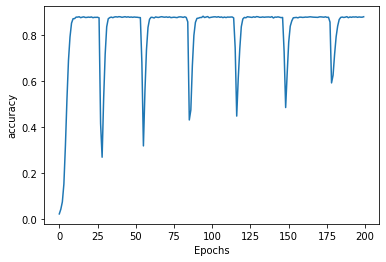

In [17]:
plot_metric(history, 'accuracy')

## Generate new text

In [18]:
seed_text = "It was a cold night."
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


It was a cold night. and than as more more thy bright ' hast done tongue remote must go well old cold thee twofold old tongue gone silent sheds held call old cold old brow well old fair thee wrought thee call be she praise my grief my worth beauteous old staineth nor shall wilt be foes old thee rolling but her fading sweets old happy me me thee down my worth thee hence bright 'this 'this thereby cloud warm my grief thou still gone ' ' ' o'er die light ' in old thee gone gone parts of hence date ' cruel bright in
